In this project, I will attempt to find the best team player in the MLB. To find this, I will be using the metrics WAR, OBP and BA. If these abbreviations are new to you, I will explain their definition and purpose below.

WAR(Wins Above Replacement)- This statistic refers to the amount of wins a player will lead their team to above the average MLB player. The WAR for the average player is a 0.0, so any positive number is an above average player. This one is self-explanatory but the thought is, a good team player shou;d be the reason his team wins more games.

OBP(On-Base Percentage)- This statistic is also self-explanatory. It measures the percentage that a player is able to make it on base between hits and walks from their at-bats.

BA(Batting Average)- This is a basic MLB statistic which measures a player's hit-per-bat rate.

In [ ]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-pavuew1c
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-pavuew1c
  Resolved https://github.com/pydata/xarray.git to commit 326dbe78d7ea887c2c242e811b7973661137617f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev31+g326dbe78-py3-none-any.whl size=1247997 sha256=d3d991d2c3654f57a33d69a92cd45d9db128e5779e59de7b493013230e4ca513
  Stored in directory: /tmp/pip-ephem-wheel-cache-n388zod8/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.1
    Uninstalling xarray-2025.1.1:
      Successfully uninstalled xarray-2025.1.1


In [ ]:

import xarray as xr


In [ ]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import bambi as bmb

In [ ]:
baseball = pd.read_csv('https://raw.githubusercontent.com/benji555-create/Data-Science/refs/heads/main/Fixed%20data.csv', header=0)
baseball

,k,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos
0,1.0,Jarren Duran*,27.0,BOS,AL,8.7,160.0,735.0,671.0,111.0,...,129.0,0.373,134.0,330.0,6.0,6.0,1.0,3.0,1.0,OF
1,2.0,Shohei Ohtani*,29.0,LAD,NL,9.2,159.0,731.0,636.0,134.0,...,190.0,0.449,190.0,411.0,7.0,6.0,0.0,5.0,10.0,DH
2,3.0,Gunnar Henderson*,23.0,BAL,AL,9.1,159.0,719.0,630.0,118.0,...,159.0,0.385,157.0,333.0,2.0,7.0,0.0,4.0,1.0,SS
3,4.0,Marcus Semien,33.0,TEX,AL,4.1,159.0,718.0,650.0,101.0,...,100.0,0.310,100.0,254.0,9.0,3.0,0.0,1.0,2.0,2B
4,5.0,Juan Soto*,25.0,NYY,AL,7.9,157.0,713.0,576.0,128.0,...,178.0,0.424,179.0,328.0,10.0,4.0,0.0,4.0,2.0,OF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,738.0,Josh Winckowski,26.0,BOS,AL,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
772,739.0,Kirby Yates*,37.0,TEX,AL,0.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
773,740.0,Alex Young*,30.0,CIN,NL,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
774,741.0,Guillo Zuñiga,25.0,LAA,AL,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Credit to Ben Gaskins to letting me use this data set. I decided to change my sport of choice for this project given the plethora of statistics available in baseball.

In [ ]:
baseball = baseball.query('PA>200')
baseball = baseball[['Player', 'WAR', 'BA', 'OBP', 'Pos']]
baseball

,Player,WAR,BA,OBP,Pos
0,Jarren Duran*,8.7,0.285,0.342,OF
1,Shohei Ohtani*,9.2,0.310,0.390,DH
2,Gunnar Henderson*,9.1,0.281,0.364,SS
3,Marcus Semien,4.1,0.237,0.308,2B
4,Juan Soto*,7.9,0.288,0.419,OF
...,...,...,...,...,...
360,Trent Grisham*,0.4,0.190,0.290,OF
361,Kyle Stowers*,-0.5,0.208,0.268,UTIL
362,Jackson Holliday*,0.1,0.189,0.255,2B
363,Jorge Mateo,0.9,0.229,0.267,2B


In [ ]:
model_WAR_Pos = bmb.Model("`BA` ~ `WAR` + Pos", data=baseball)
idata_WAR_Pos = model_WAR_Pos.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='WAR', ylabel='BA'>], dtype=object))

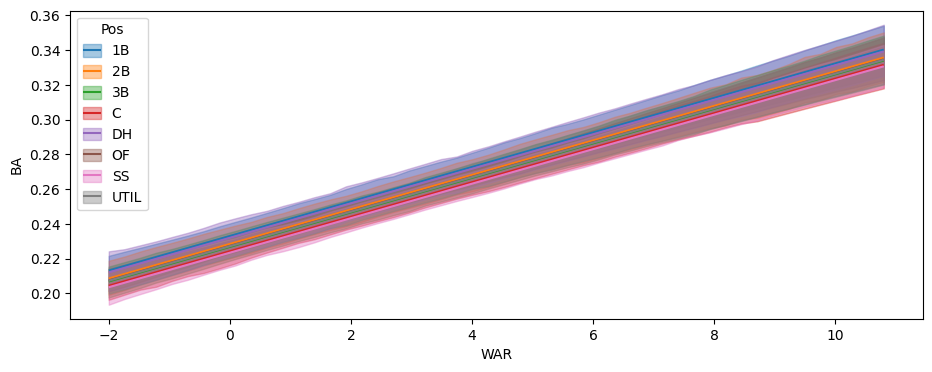

In [ ]:
bmb.interpret.plot_predictions(model_WAR_Pos,
                               idata_WAR_Pos,
                                ["WAR",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
model_baseball_OBP = bmb.Model("`BA` ~ `OBP` + Pos + `OBP`:Pos", data=baseball)
idata_baseball_OBP = model_baseball_HR.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='OBP', ylabel='BA'>], dtype=object))

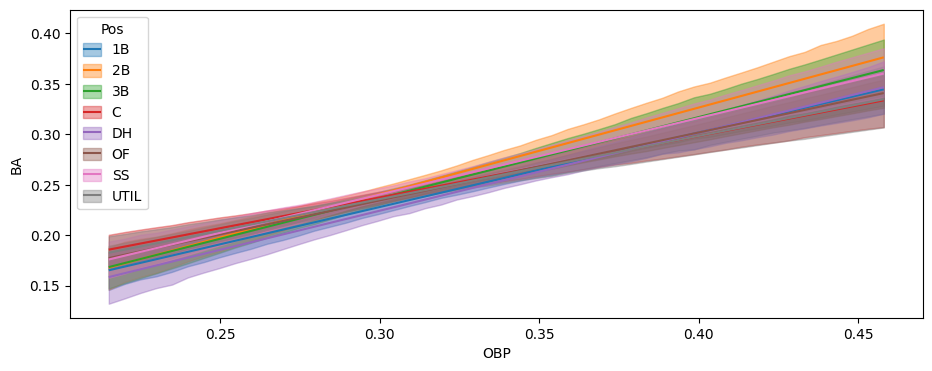

In [ ]:
bmb.interpret.plot_predictions(model_baseball_OBP,
                               idata_baseball_OBP,
                               ["OBP","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
model_pos_OBP_inter = bmb.Model("`BA` ~ `WAR` + Pos + `OBP` + Pos:`OBP`", data=baseball)
idata_baseball_pos_OBP = model_pos_OBP_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1400 with 8 Axes>,
 array([[<Axes: title={'center': 'Pos = 1B'}, xlabel='WAR', ylabel='BA'>,
         <Axes: title={'center': 'Pos = 2B'}, xlabel='WAR', ylabel='BA'>,
         <Axes: title={'center': 'Pos = 3B'}, xlabel='WAR', ylabel='BA'>,
         <Axes: title={'center': 'Pos = C'}, xlabel='WAR', ylabel='BA'>],
        [<Axes: title={'center': 'Pos = DH'}, xlabel='WAR', ylabel='BA'>,
         <Axes: title={'center': 'Pos = OF'}, xlabel='WAR', ylabel='BA'>,
         <Axes: title={'center': 'Pos = SS'}, xlabel='WAR', ylabel='BA'>,
         <Axes: title={'center': 'Pos = UTIL'}, xlabel='WAR', ylabel='BA'>]],
       dtype=object))

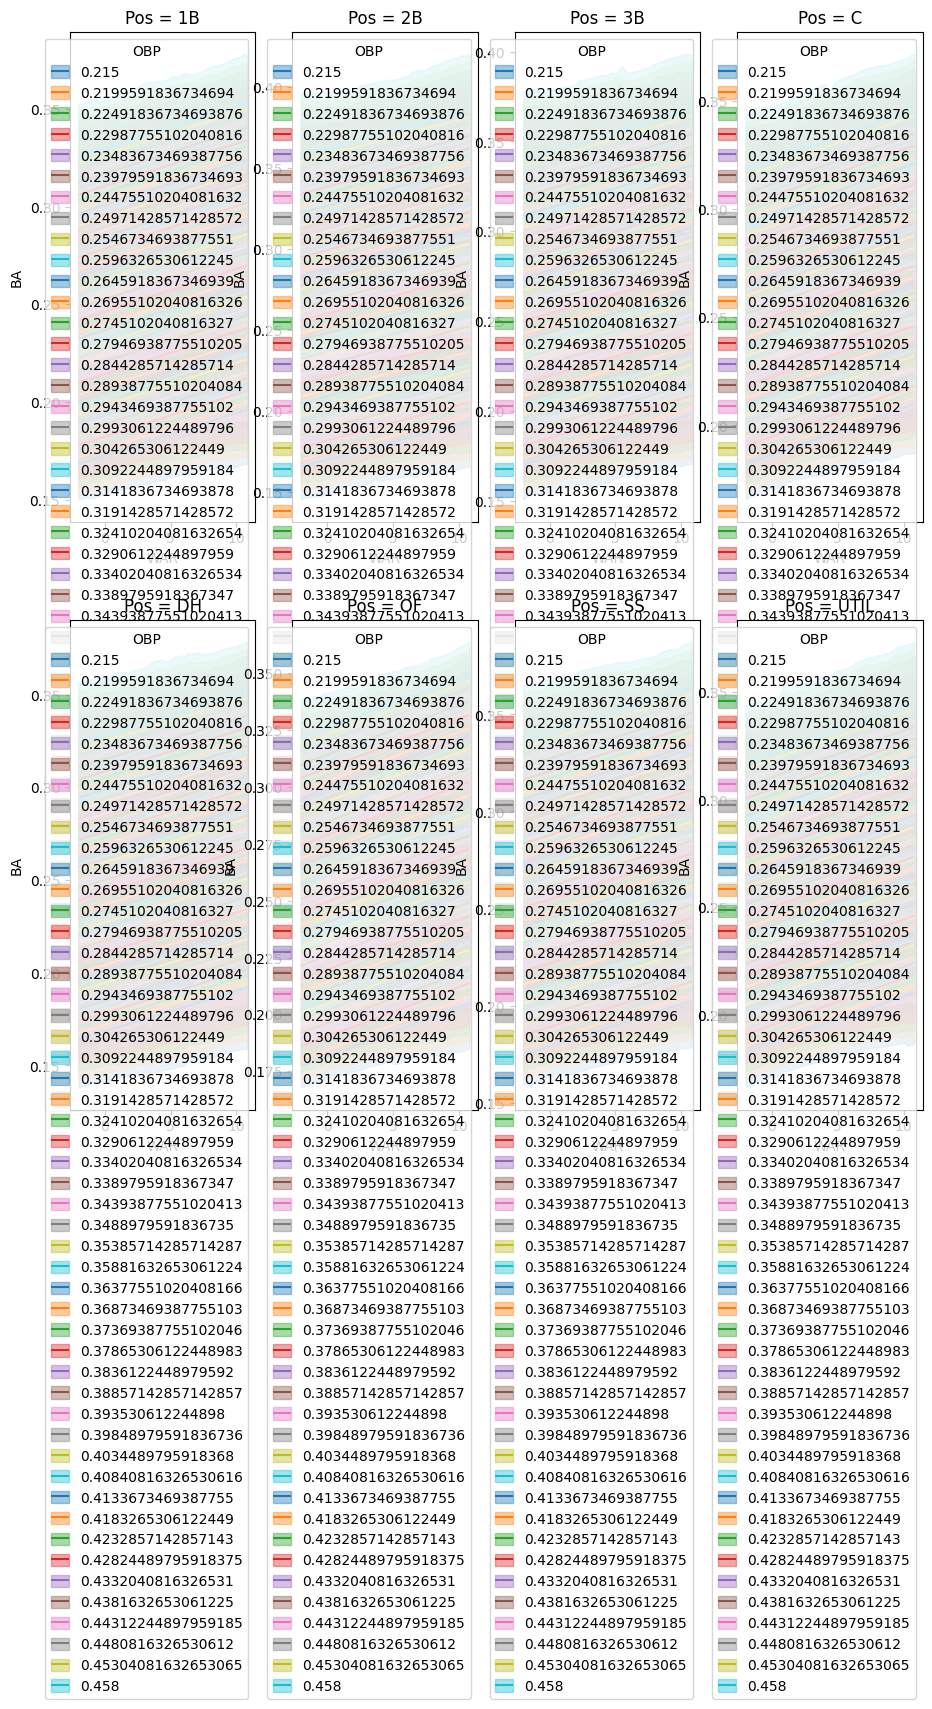

In [ ]:
bmb.interpret.plot_predictions(model_pos_OBP_inter,
                               idata_baseball_pos_OBP,
                               ["WAR", "OBP", "Pos"],
                               fig_kwargs={"figsize":(11, 14)})

In [ ]:
model_OBP_WAR = bmb.Model("`BA` ~ `WAR` + `OBP` + `WAR`:`OBP`", data=baseball)
idata_OBP_WAR = model_OBP_WAR.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='WAR', ylabel='BA'>], dtype=object))

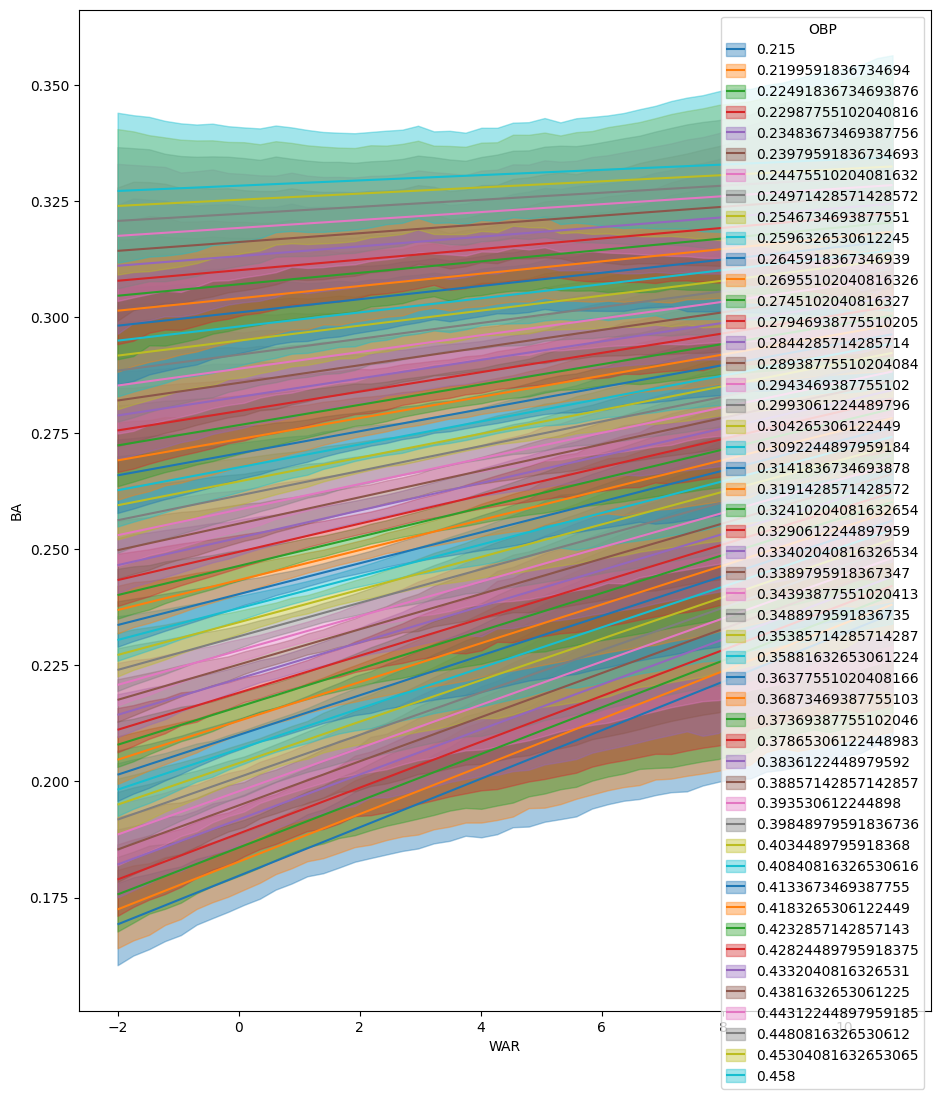

In [ ]:
bmb.interpret.plot_predictions(model_OBP_WAR,
                               idata_OBP_WAR,
                               ["WAR","OBP"],
                               fig_kwargs={"figsize":(11, 13)})

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

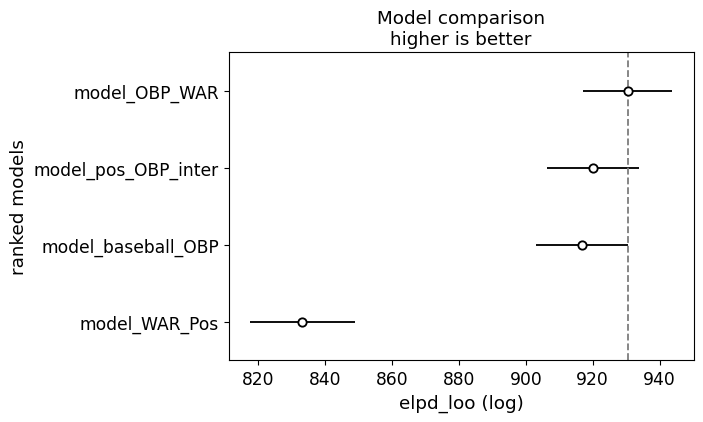

In [ ]:
compare = az.compare({"model_OBP_WAR":idata_OBP_WAR, "model_pos_OBP_inter":idata_baseball_pos_OBP, "model_baseball_OBP":idata_baseball_OBP, "model_WAR_Pos":idata_WAR_Pos})
az.plot_compare(compare)

In [ ]:
model_5 = bmb.Model("`BA` ~ `WAR` + Pos + `OBP` + RBI + Pos:`OBP`", data=baseball)
idata_5 = model_5.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

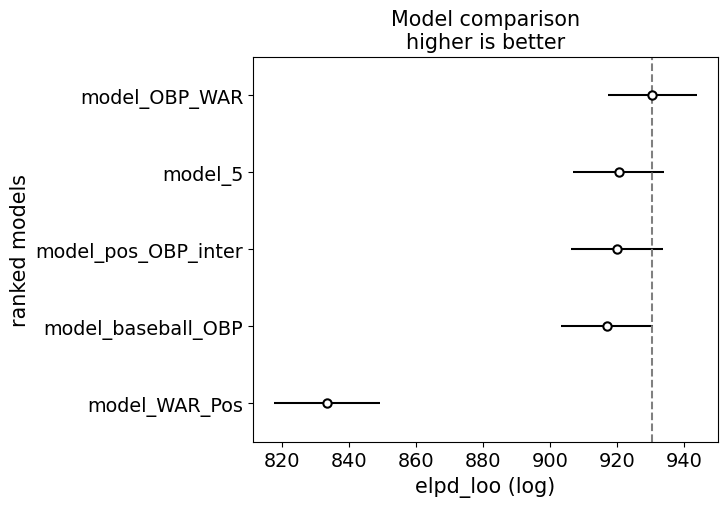

In [ ]:
compare = az.compare({"model_OBP_WAR":idata_OBP_WAR, "model_pos_OBP_inter":idata_baseball_pos_OBP, "model_baseball_OBP":idata_baseball_OBP, "model_WAR_Pos":idata_WAR_Pos, "model_5":idata_5})
az.plot_compare(compare)

This model represents my data really well. As you can see, OBP and WAR are two complimentary statistics. I Believe that an emphasis on OBP was the best way to reach the goal as, noo matter how you get there, baseball is won and lost by scoring bases. I thought that emphasizing the difference in positions would be a good way to more accuratley depict what a team player looks like for different aspects of the team but, with focus I put on hitting statistics, that emphasis only served to overcomplicate the data. I still believe that this data paints a detailed picture at what statistics should represent a true MLB team player.